In [1]:
import sys
sys.path.insert(0, "../")
from ds_custom_tools import corrplot_, _value_to_category

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# SECTION 1: _Exploratory Data Analysis_

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
dataset = pd.DataFrame(data=boston.data, columns=boston.feature_names)
target = pd.DataFrame(data=boston.target, columns=["MEDV"])

In [4]:
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [5]:
target.head(3)

,MEDV
0,24.0
1,21.6
2,34.7


In [6]:
def plot_two_features(independent_variable, dependent_variable="MEDV"):
    """ Visualizes the scatterplot of data across two features. """
    if dependent_variable == "MEDV":
        plt.scatter(dataset[independent_variable], target[dependent_variable])
    else:
        plt.scatter(dataset[independent_variable], dataset[dependent_variable])
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)

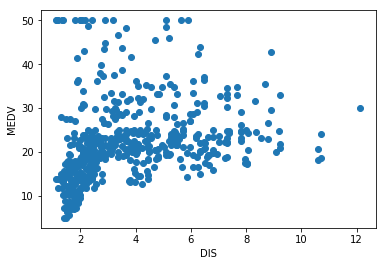

In [7]:
plot_two_features("DIS")

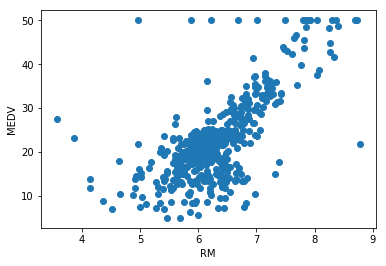

In [8]:
plot_two_features("RM")

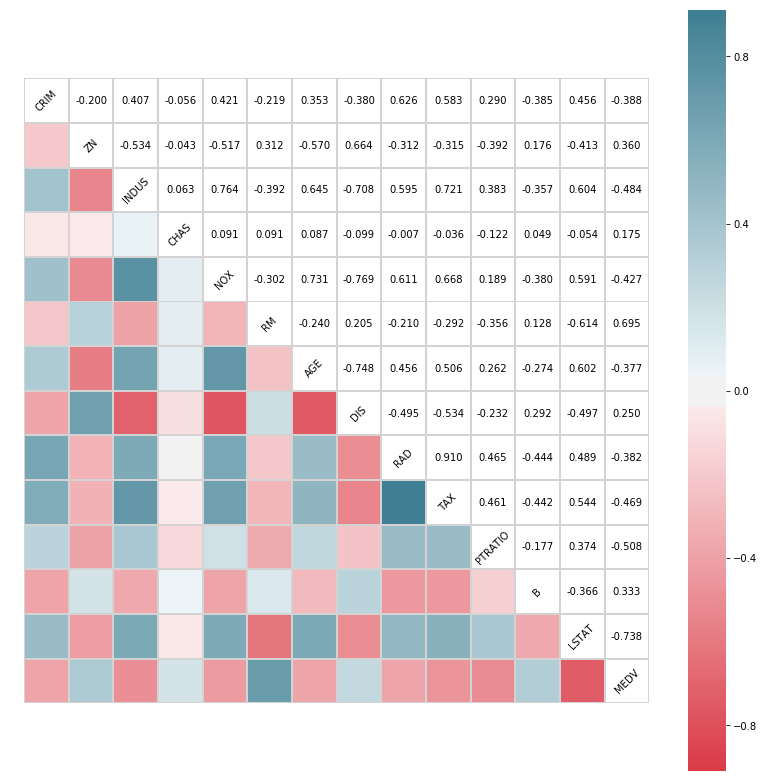

In [9]:
df = pd.concat([dataset, target], axis=1)
corrplot_(df)

# SECTION 2: _Machine Learning_

## The feature that correlates best with the label `MEDV` is the feature: `LSTAT`. Let's look at those two variables first!

---

### STEP 1: Get our data and split it into training and testing segments.

In [10]:
X, y = np.array(dataset["LSTAT"]).reshape(-1, 1), np.array(target["MEDV"]).reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### STEP 2: Initialize our model.

In [12]:
model = LinearRegression()

### STEP 3: Fit our model to our training data (`X_train`, `y_train`).

In [13]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### STEP 4: Predict using fitted model against test data (`X_test`).

In [14]:
y_pred = model.predict(X_test)

### STEP 5: Compare predicted results (`y_pred`) against actual holdout data (`y_test`).

In [15]:
global_error = 0

for index, item in enumerate(y_pred):
    if item != y_test[index]:
        global_error += 1
        
print("The overall prediction error is {}%".format(100 * global_error / len(y_pred)))
print("\nWARNING: This error metric is for CLASSIFICATION!!! Cannot be used for REGRESSION!!!\n")

The overall prediction error is 100.0%




### STEP 5 (REVISED): Compute accuracy and error metrics using regression tactics.

In [16]:
RSq = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

In [17]:
accuracy = model.score(X_test, y_test)
print("MODEL ACCURACY FOR ONE FEATURE IS {:.2f}%.".format(100 * accuracy))

MODEL ACCURACY FOR ONE FEATURE IS 53.30%.


### STEPS 1-5, including multiple iterations to get global accuracy!

In [18]:
X, y = np.array(dataset["LSTAT"]).reshape(-1, 1), np.array(target["MEDV"]).reshape(-1, 1)

global_accuracy = 0
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    RSq = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)

    accuracy = model.score(X_test, y_test)
    global_accuracy += accuracy
print("MODEL ACCURACY FOR ONE FEATURE IS {:.2f}%.".format(global_accuracy))

MODEL ACCURACY FOR ONE FEATURE IS 53.52%.


## The strongest correlated feature produces an accuracy of approximately `~50%`. Not bad, but not great either.

## Now, let's use the top two best correlated features and see what happens.

---

1. `LSTAT`
2. `RM`

In [19]:
X, y = dataset[["LSTAT", "RM"]], target["MEDV"]

global_accuracy = 0
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y)  # Random Sampling!

    model_two_feat = LinearRegression()
    model_two_feat.fit(X_train, y_train)

    y_pred = model_two_feat.predict(X_test)

    RSq = r2_score(y_test, y_pred)
    global_accuracy += RSq
print("MODEL ACCURACY FOR TWO FEATURES IS {:.2f}%.".format(global_accuracy))

MODEL ACCURACY FOR TWO FEATURES IS 62.69%.


## The strongest two correlated features produce an accuracy of approximately `~60%`. Better, but we can improve!

## Now, let's use _all the features_!

---

In [20]:
X, y = dataset, target["MEDV"]

global_accuracy = 0
for iteration in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y)  # Random Sampling!

    model_all_feat = LinearRegression()
    model_all_feat.fit(X_train, y_train)

    y_pred = model_all_feat.predict(X_test)

    RSq = r2_score(y_test, y_pred)
    global_accuracy += RSq
print("MODEL ACCURACY FOR TWO FEATURES IS {:.2f}%.".format(global_accuracy))

MODEL ACCURACY FOR TWO FEATURES IS 71.00%.
